In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split,validation_curve, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV, StratifiedShuffleSplit, RepeatedStratifiedKFold, cross_validate, TunedThresholdClassifierCV, FixedThresholdClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, RocCurveDisplay, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay,classification_report, recall_score, precision_score, accuracy_score, RocCurveDisplay, precision_recall_curve, roc_curve, precision_recall_curve
from IPython.display import display_html

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [5]:
df = pd.read_csv(path_train)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.0,0.74,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1,11.0,0.26,0.68,2.55,0.085,10.0,25.0,0.99700,3.18,0.61,11.8,5
2,7.3,0.38,0.21,2.00,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5
3,8.9,0.28,0.45,1.70,0.067,7.0,12.0,0.99354,3.25,0.55,12.3,7
4,9.2,0.41,0.50,2.50,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1290,9.5,0.39,0.41,8.90,0.069,18.0,39.0,0.99859,3.29,0.81,10.9,7
1291,8.5,0.34,0.40,4.70,0.055,3.0,9.0,0.99738,3.38,0.66,11.6,7
1292,15.0,0.21,0.44,2.20,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
1293,7.5,0.52,0.40,2.20,0.060,12.0,20.0,0.99474,3.26,0.64,11.8,6


In [6]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1294 non-null   float64
 1   volatile acidity      1294 non-null   float64
 2   citric acid           1295 non-null   float64
 3   residual sugar        1295 non-null   float64
 4   chlorides             1295 non-null   float64
 5   free sulfur dioxide   1295 non-null   float64
 6   total sulfur dioxide  1295 non-null   float64
 7   density               1295 non-null   float64
 8   pH                    1294 non-null   float64
 9   sulphates             1293 non-null   float64
 10  alcohol               1295 non-null   float64
 11  quality               1295 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 121.5 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1294.000000,1294.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1294.000000,1293.000000,1295.000000,1295.000000
mean,8.438872,0.500920,0.298880,2.573398,0.085467,15.362934,44.651351,0.996576,3.303648,0.678415,10.676100,5.937452
std,1.818823,0.182181,0.200443,1.366700,0.045056,10.487662,35.420622,0.001968,0.157238,0.169927,1.174136,0.955717
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,7.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.360000,0.120000,1.900000,0.068000,7.000000,20.000000,0.995315,3.200000,0.570000,9.600000,5.000000
50%,8.100000,0.480000,0.310000,2.200000,0.078000,13.000000,34.000000,0.996600,3.300000,0.640000,10.500000,6.000000
75%,9.400000,0.620000,0.455000,2.600000,0.090000,21.000000,57.000000,0.997765,3.390000,0.760000,11.500000,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [7]:
print((df.isna().sum() / len(df)).round(4) * 100) #процент пропущенных значений
df = df.dropna()
df.isnull().sum()

fixed acidity           0.08
volatile acidity        0.08
citric acid             0.00
residual sugar          0.00
chlorides               0.00
free sulfur dioxide     0.00
total sulfur dioxide    0.00
density                 0.00
pH                      0.08
sulphates               0.15
alcohol                 0.00
quality                 0.00
dtype: float64


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
duplicate = df[df.duplicated()]
df = df.drop_duplicates()#не влияет на решение классификации

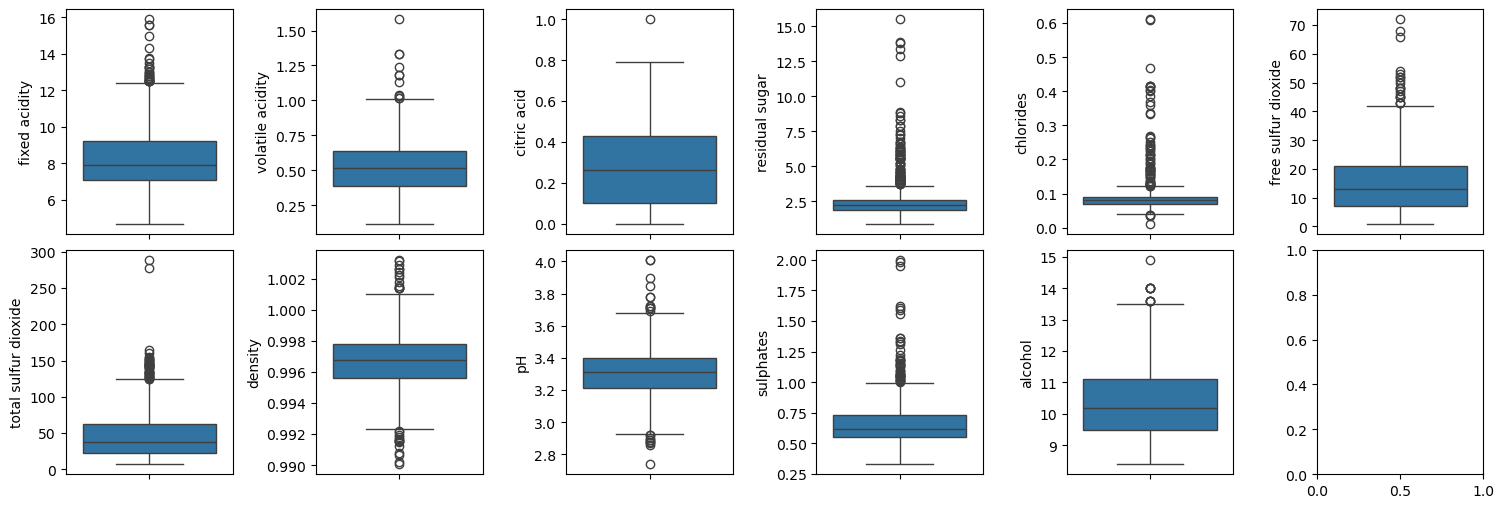

In [9]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in df.columns:
  if i != 'quality':
    sns.boxplot(y=i, data=df, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

In [10]:
df_1 = df.copy()
df_1['quality'] = df_1['quality'].apply(lambda x: 'good' if x > 6 else 'bad')
df_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.0,0.74,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,bad
1,11.0,0.26,0.68,2.55,0.085,10.0,25.0,0.99700,3.18,0.61,11.8,bad
2,7.3,0.38,0.21,2.00,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,bad
3,8.9,0.28,0.45,1.70,0.067,7.0,12.0,0.99354,3.25,0.55,12.3,good
4,9.2,0.41,0.50,2.50,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,good
...,...,...,...,...,...,...,...,...,...,...,...,...
1285,6.8,0.81,0.05,2.00,0.070,6.0,14.0,0.99562,3.51,0.66,10.8,bad
1286,5.9,0.46,0.00,1.90,0.077,25.0,44.0,0.99385,3.50,0.53,11.2,bad
1288,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,bad
1289,13.5,0.53,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,bad


In [11]:
X = df_1.drop(['quality'], axis = 1)
y = df_1.quality.map({'bad':0, 'good':1})
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.25,stratify = y)
X_train.shape

(761, 11)

In [12]:
y.value_counts()

quality
0    877
1    138
Name: count, dtype: int64

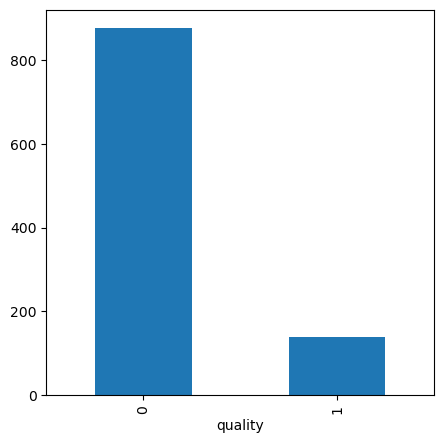

In [13]:
y.value_counts().plot(x=0, y=1, kind='bar', figsize=(5,5))
plt.show()#дисбаланс классов

In [14]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=8)
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier(n_jobs=-1))])

n_neighbors=np.arange(40, 55)
p=np.arange(1,4)
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()], #Подбить нормалайзер?
     'classifier': [KNeighborsClassifier(n_jobs=-1)],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]
random_search = RandomizedSearchCV(pipe, param_grid, cv=cv, n_jobs=-1)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=8, n_splits=4, random_state=None),
                   estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                             ('classifier',
                                              KNeighborsClassifier(n_jobs=-1))]),
                   n_jobs=-1,
                   param_distributions=[{'classifier': [KNeighborsClassifier(n_jobs=-1)],
                                         'classifier__n_neighbors': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]),
                                         'classifier__p': array([1, 2, 3]),
                                         'classifier__weights': ['uniform',
                                                                 'distance'],
                                         'preprocessing': [MinMaxScaler(),
                                                           StandardScaler(),
                                                           RobustScaler()]}])

In [15]:
random_search_result = pd.DataFrame(random_search.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
random_search_result

,6,9,7,0,8,3,4,5,2,1
mean_fit_time,0.00708,0.007373,0.006977,0.007478,0.006995,0.010083,0.009538,0.009236,0.009206,0.01059
std_fit_time,0.002777,0.001661,0.001233,0.001499,0.001554,0.00269,0.001918,0.001466,0.002318,0.005088
mean_score_time,0.035617,0.032329,0.032393,0.052793,0.047467,0.050667,0.052339,0.060881,0.077939,0.061177
std_score_time,0.006762,0.003352,0.002724,0.010765,0.00302,0.007473,0.008275,0.009942,0.009839,0.012499
param_preprocessing,MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler()
param_classifier__weights,distance,distance,distance,uniform,uniform,uniform,uniform,distance,uniform,distance
param_classifier__p,2,2,2,2,1,1,1,3,3,3
param_classifier__n_neighbors,52,47,50,48,41,49,44,50,40,54
param_classifier,KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1)
params,"{'preprocessing': MinMaxScaler(), 'classifier_...","{'preprocessing': StandardScaler(), 'classifie...","{'preprocessing': MinMaxScaler(), 'classifier_...","{'preprocessing': MinMaxScaler(), 'classifier_...","{'preprocessing': MinMaxScaler(), 'classifier_...","{'preprocessing': RobustScaler(), 'classifier_...","{'preprocessing': RobustScaler(), 'classifier_...","{'preprocessing': RobustScaler(), 'classifier_...","{'preprocessing': RobustScaler(), 'classifier_...","{'preprocessing': RobustScaler(), 'classifier_..."


In [16]:
random_search.best_params_

{'preprocessing': MinMaxScaler(),
 'classifier__weights': 'distance',
 'classifier__p': 2,
 'classifier__n_neighbors': 52,
 'classifier': KNeighborsClassifier(n_jobs=-1)}

In [17]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])
n_neighbors= np.arange(40, 50)
p=np.arange(1,6)
weights=['uniform','distance'] 

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()], 
     'classifier': [KNeighborsClassifier()], 
     'classifier__n_neighbors': n_neighbors, 
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=cv, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                          'classifier__p': array([1, 2, 3, 4, 5]),
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}])

In [18]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).iloc[:, :10].T
grid_result

,28,268,156,76,36,20,68,148,316,196,...,367,371,375,379,383,387,391,395,399,23
mean_fit_time,0.005188,0.006758,0.004907,0.005927,0.005697,0.005791,0.005209,0.005324,0.005734,0.005226,...,0.007079,0.008989,0.007143,0.006559,0.006655,0.006028,0.005903,0.005944,0.005999,0.005238
std_fit_time,0.001357,0.004148,0.000885,0.003059,0.002096,0.004055,0.001079,0.001703,0.000952,0.000721,...,0.002893,0.005548,0.002757,0.002087,0.004841,0.001948,0.001382,0.00138,0.001205,0.001703
mean_score_time,0.0355,0.045838,0.037307,0.038676,0.038185,0.035611,0.037316,0.039056,0.038612,0.037079,...,0.007608,0.02376,0.007551,0.03353,0.023903,0.032097,0.020245,0.032603,0.022887,0.017636
std_score_time,0.003515,0.01,0.004929,0.005041,0.012333,0.001923,0.005401,0.006057,0.00346,0.002698,...,0.003288,0.00835,0.002482,0.00578,0.009787,0.00667,0.00365,0.006748,0.011943,0.005157
param_classifier,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),...,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier()
param_classifier__n_neighbors,40,46,43,41,40,40,41,43,47,44,...,49,49,49,49,49,49,49,49,49,40
param_classifier__p,4,4,5,5,5,3,4,4,5,5,...,1,2,2,3,3,4,4,5,5,3
param_classifier__weights,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,...,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,distance
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...",...,"{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi..."


In [19]:
grid.best_params_

{'classifier': KNeighborsClassifier(),
 'classifier__n_neighbors': 40,
 'classifier__p': 4,
 'classifier__weights': 'distance',
 'preprocessing': MinMaxScaler()}

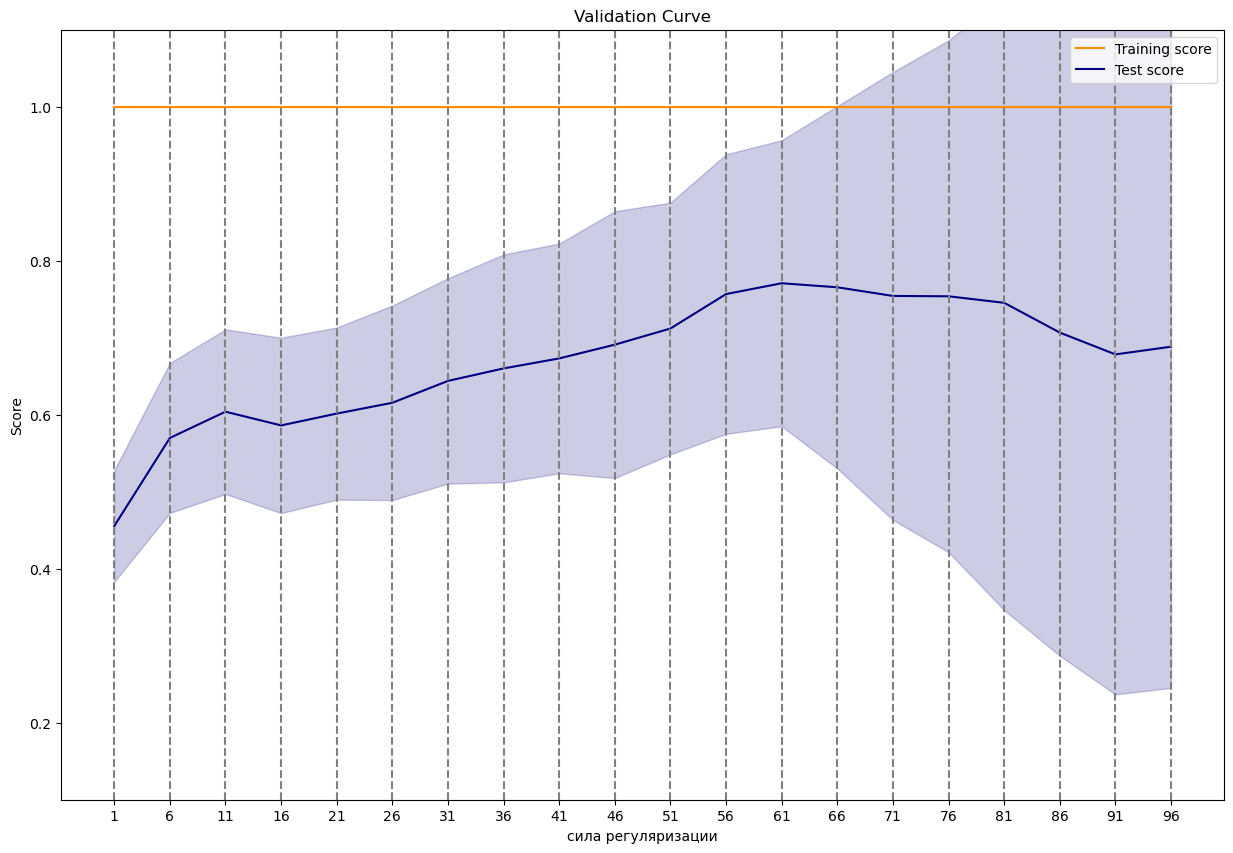

In [20]:
pipe_fin = make_pipeline(StandardScaler(), KNeighborsClassifier(p = 1, weights = 'distance', n_jobs = -1))
n_range = np.arange(1, 100, 5)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
train_scores, test_scores = validation_curve(
    pipe_fin , X_train, y_train,
    param_name = "kneighborsclassifier__n_neighbors", 
    param_range = n_range,
    cv = cv, 
    scoring="precision", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve")
plt.xlabel("сила регуляризации")
plt.ylabel("Score")
plt.ylim(0.1, 1.1)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Test score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.xticks(np.arange(1, 100, 5))
for i in np.arange(1, 100, 5):
    plt.vlines(i, 0.1,1.1, linestyles='dashed', colors='gray')

plt.legend(loc="best")
plt.show();

In [21]:
model_1 = Pipeline([('preprocessing',StandardScaler()), 
                 ('classifier', KNeighborsClassifier(n_neighbors = 48, p = 1, weights = 'uniform', n_jobs = -1))])
model_2 = Pipeline([('preprocessing',StandardScaler()), 
                 ('classifier', KNeighborsClassifier(n_neighbors = 46, p = 1, weights = 'uniform', n_jobs = -1))])
model_3 = Pipeline([('preprocessing',StandardScaler()), 
                 ('classifier', KNeighborsClassifier(n_neighbors = 43, p = 1, weights = 'uniform', n_jobs = -1))])
model_4 = Pipeline([('preprocessing',StandardScaler()), 
                 ('classifier', KNeighborsClassifier(n_neighbors = 41, p = 1, weights = 'distance', n_jobs = -1))])
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=41, p=1,
                                      weights='distance'))])

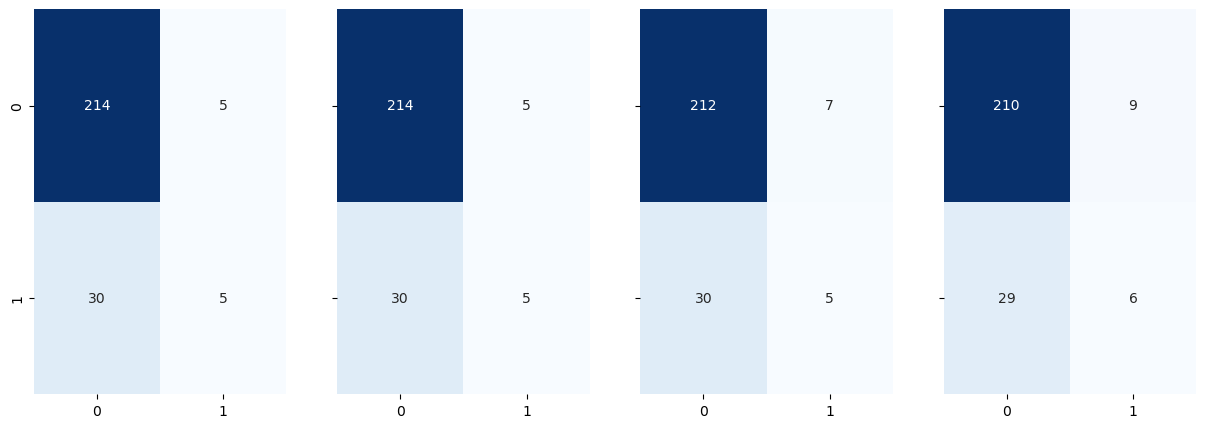

In [22]:
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)
y_pred_4 = model_4.predict(X_test)
matrix_1=confusion_matrix(y_test,y_pred_1)
matrix_2=confusion_matrix(y_test,y_pred_2)
matrix_3=confusion_matrix(y_test,y_pred_3)
matrix_4=confusion_matrix(y_test,y_pred_4)
fig,ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 4, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 4, 2)
sns.heatmap(matrix_2,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 4, 3)
sns.heatmap(matrix_3,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 4, 4)
sns.heatmap(matrix_4,annot=True, fmt='g', cbar=None,cmap="Blues");

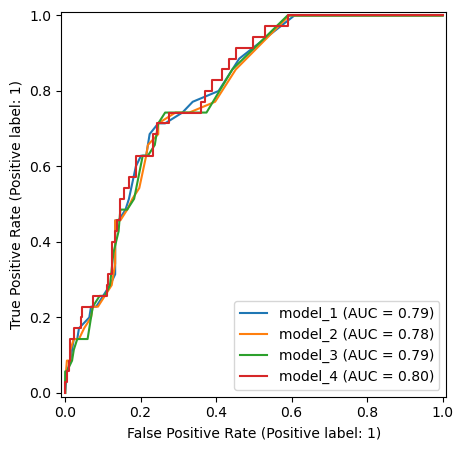

In [23]:
fig, ax_roc = plt.subplots(1,1, figsize=(10, 5))
RocCurveDisplay.from_estimator(model_1, X_test, y_test, ax = ax_roc, name = 'model_1');
RocCurveDisplay.from_estimator(model_2, X_test, y_test, ax = ax_roc, name = 'model_2');
RocCurveDisplay.from_estimator(model_3, X_test, y_test, ax = ax_roc, name = 'model_3');
RocCurveDisplay.from_estimator(model_4, X_test, y_test, ax = ax_roc, name = 'model_4');


In [24]:
model = Pipeline([('preprocessing',StandardScaler()), 
                 ('classifier', KNeighborsClassifier(n_neighbors = 41, p = 1, weights = 'distance', n_jobs = -1))])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=41, p=1,
                                      weights='distance'))])

In [25]:
y_best = model.predict(X_test)
matrix=confusion_matrix(y_test,y_best)

In [26]:
print(classification_report(y_test, y_best))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       219
           1       0.40      0.17      0.24        35

    accuracy                           0.85       254
   macro avg       0.64      0.57      0.58       254
weighted avg       0.81      0.85      0.82       254



Text(0.5, 1.0, 'Precision-Recall Curve')

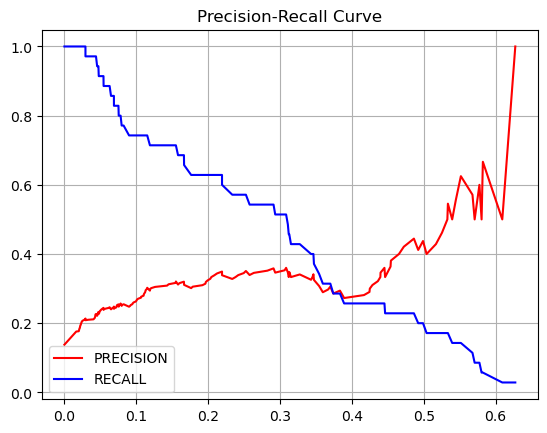

In [27]:
precision, recall, threshold = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])  
plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION') 
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL') 
plt.grid() 
plt.legend() 
plt.title('Precision-Recall Curve')

позиция порога 0.5 -  11
в позиции 13 для ROC
fpr:     0.046  tpr:        0.229  thresholds:,0.486
recall:  0.229  precision:, 0.444  thresholds:,0.486


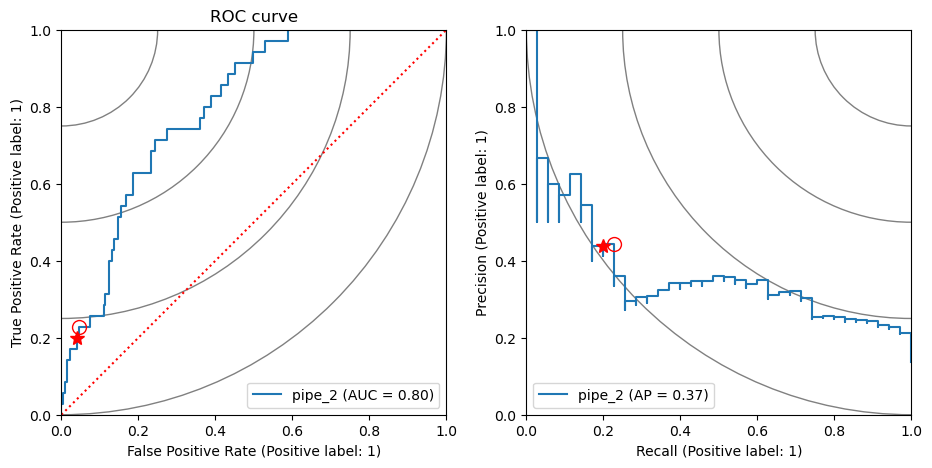

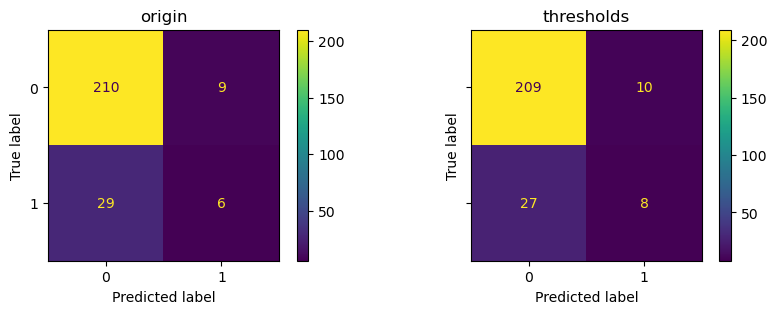

,precision,recall,f1-score,support
0,0.878661,0.958904,0.917031,219.000000
1,0.400000,0.171429,0.240000,35.000000
accuracy,0.850394,0.850394,0.850394,0.850394
macro avg,0.639331,0.565166,0.578515,254.000000
weighted avg,0.812704,0.850394,0.823739,254.000000
,precision,recall,f1-score,support
0,0.885593,0.954338,0.918681,219.000000
1,0.444444,0.228571,0.301887,35.000000
accuracy,0.854331,0.854331,0.854331,0.854331
macro avg,0.665019,0.591455,0.610284,254.000000


In [28]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label = None)
pos = find_nearest(thresholds,0.48)
point = find_nearest(thresholds,0.5) 
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(11, 5))

RocCurveDisplay.from_estimator(model, X_test, y_test, name = 'pipe_2', ax=ax1)
ax1.set_title("ROC curve")
ax1.plot([0,1],[0,1], color="r", ls=":")
ax1.plot(fpr[point],tpr[point], '*', markersize=10, color="r")
ax1.plot(fpr[pos],tpr[pos], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((0, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((0, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((0, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((0, 1), 1, color='gray',fill=False)
ax1.add_patch(circle0)
ax1.add_patch(circle1)
ax1.add_patch(circle2)
ax1.add_patch(circle3)
ax1.set_xlim((0, 1))
ax1.set_ylim((0, 1))

precision, recall, thresholds_pr = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1], pos_label = None)
PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name = 'pipe_2', ax=ax2)
point_pr = find_nearest(thresholds_pr,0.5)  
pos_pr = find_nearest(thresholds_pr,thresholds[pos]) 

ax2.plot(recall[point_pr],precision[point_pr], '*', markersize=10, color="r")
ax2.plot(recall[pos_pr],precision[pos_pr], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((1, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((1, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((1, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((1, 1), 1, color='gray',fill=False)
ax2.add_patch(circle0)
ax2.add_patch(circle1)
ax2.add_patch(circle2)
ax2.add_patch(circle3)
ax2.set_xlim((0, 1))
ax2.set_ylim((0, 1))

print( 'позиция порога 0.5 - ', point)
print( 'в позиции', pos, 'для ROC')
print( f'fpr:     {fpr[pos]:.3f}',       f' tpr:        {tpr[pos]:.3f}',          f' thresholds:,{thresholds[pos]:.3f}')
print( f'recall:  {recall[pos_pr]:.3f}', f' precision:, {precision[pos_pr]:.3f}', f' thresholds:,{thresholds[pos]:.3f}')


y_thresholds = np.where(model.predict_proba(X_test)[:,1]>=thresholds[pos], 1, 0)

matrix_thresholds = confusion_matrix(y_test, y_thresholds)

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,3))

ConfusionMatrixDisplay(matrix).plot(ax = ax1);
ax1.title.set_text("origin")
ConfusionMatrixDisplay(matrix_thresholds).plot(ax = ax2);
ax2.title.set_text("thresholds")
plt.show()

df1 = pd.DataFrame(classification_report(y_test, y_best, output_dict=True)).T
df2 = pd.DataFrame(classification_report(y_test, y_thresholds, output_dict=True)).T

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('origin')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('thresholds')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

In [29]:
final_tune = FixedThresholdClassifier(model, threshold=thresholds[pos]).fit(X_train, y_train)
y_best_fin = final_tune.predict(X_test)
print('До изменения порога')
print(classification_report(y_test, y_best))
print('После изменения порога')
print(classification_report(y_test, y_best_fin))

До изменения порога
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       219
           1       0.40      0.17      0.24        35

    accuracy                           0.85       254
   macro avg       0.64      0.57      0.58       254
weighted avg       0.81      0.85      0.82       254

После изменения порога
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       219
           1       0.44      0.23      0.30        35

    accuracy                           0.85       254
   macro avg       0.67      0.59      0.61       254
weighted avg       0.82      0.85      0.83       254



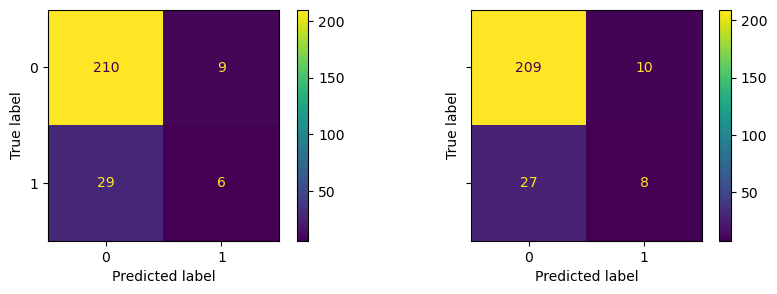

In [30]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,3))
matrix_2=confusion_matrix(y_test, y_best_fin)
ConfusionMatrixDisplay(matrix).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_2).plot(ax = ax2);
plt.show()